In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('DataSet/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [64]:
pd.unique(df.Species)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<h3>Label Encoding</h3>

In [65]:
y, class_names = pd.factorize(df.Species, sort=True)

In [66]:
y[40:60]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [67]:
pd.unique(y)

array([0, 1, 2])

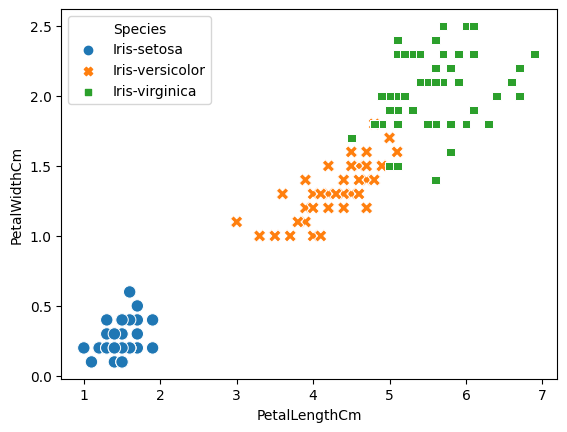

In [68]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species', style='Species', s=80)
plt.show()

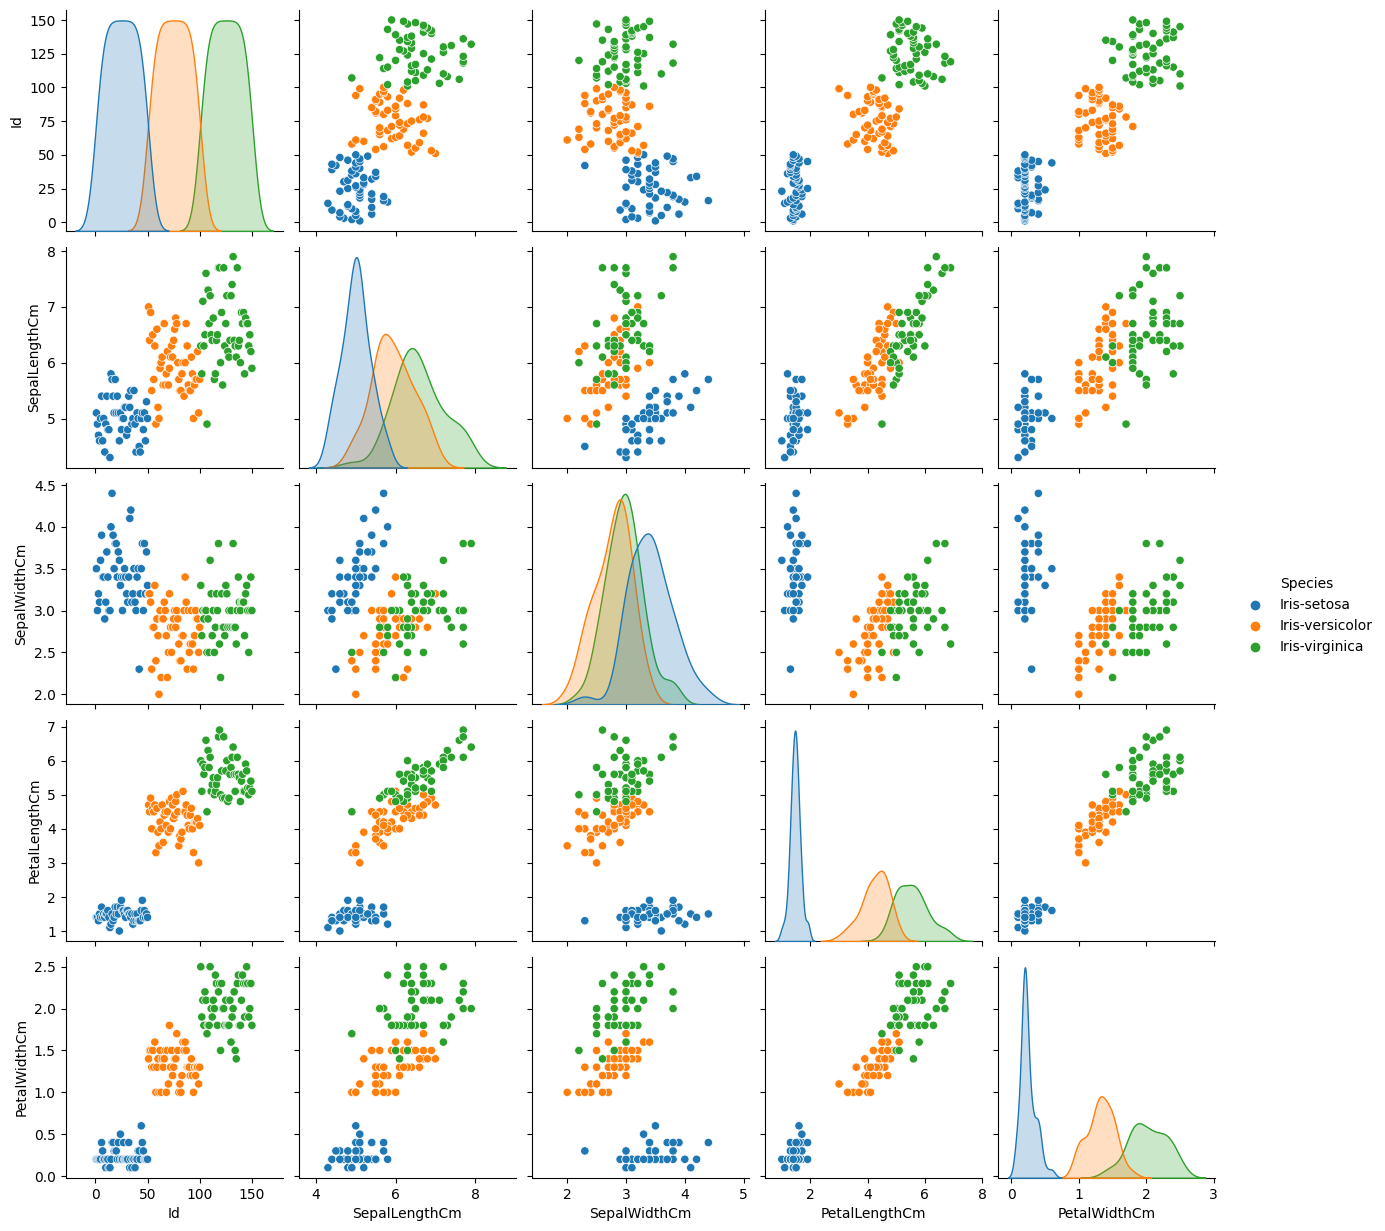

In [69]:
sns.pairplot(df, hue='Species')

<h3>Feature Scaling</h3>

In [70]:
x = df.drop(['Species', 'Id'], axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [71]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_cs = sc.fit_transform(x)
x_cs[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

<h3>Cross validation</h3>

In [72]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

model = MLPClassifier(random_state=1, verbose=True, max_iter=2000, hidden_layer_sizes=(50))

cvs = cross_val_score(model, x_cs, y, cv=5)
print('cross val score : {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}'.format(cvs.mean()*100))

Iteration 1, loss = 1.02372153
Iteration 2, loss = 1.00885768
Iteration 3, loss = 0.99424542
Iteration 4, loss = 0.97988620
Iteration 5, loss = 0.96576240
Iteration 6, loss = 0.95188182
Iteration 7, loss = 0.93822498
Iteration 8, loss = 0.92480290
Iteration 9, loss = 0.91160071
Iteration 10, loss = 0.89858162
Iteration 11, loss = 0.88575737
Iteration 12, loss = 0.87314453
Iteration 13, loss = 0.86074446
Iteration 14, loss = 0.84856185
Iteration 15, loss = 0.83659481
Iteration 16, loss = 0.82483409
Iteration 17, loss = 0.81327799
Iteration 18, loss = 0.80192511
Iteration 19, loss = 0.79078861
Iteration 20, loss = 0.77986760
Iteration 21, loss = 0.76915597
Iteration 22, loss = 0.75865460
Iteration 23, loss = 0.74836790
Iteration 24, loss = 0.73825553
Iteration 25, loss = 0.72832805
Iteration 26, loss = 0.71858915
Iteration 27, loss = 0.70903750
Iteration 28, loss = 0.69967069
Iteration 29, loss = 0.69048622
Iteration 30, loss = 0.68147730
Iteration 31, loss = 0.67265055
Iteration 32, los

<h3>Train-Test Split</h3>

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_cs, y, test_size=0.25, random_state=20)

len(x_train), len(x_test)

(112, 38)

In [74]:
print("x_train[:5]")
print(x_train[:5])
print("y_train[:5]")
print(y_train[:5])

x_train[:5]
[[ 0.67450115  0.33784833  0.42156442  0.39617188]
 [ 1.88617985 -0.58776353  1.33141568  0.92206376]
 [-0.17367395 -0.58776353  0.42156442  0.13322594]
 [ 0.31099753 -1.05056946  1.04708716  0.26469891]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]
y_train[:5]
[1 2 1 2 0]


<h3>MLPClassifier Model</h3>

In [75]:
model = MLPClassifier(random_state=1, verbose=True, max_iter=2000, hidden_layer_sizes=(50))
model.fit(x_train, y_train)

Iteration 1, loss = 1.02596502
Iteration 2, loss = 1.01059343
Iteration 3, loss = 0.99547758
Iteration 4, loss = 0.98061497
Iteration 5, loss = 0.96598743
Iteration 6, loss = 0.95159970
Iteration 7, loss = 0.93745754
Iteration 8, loss = 0.92356403
Iteration 9, loss = 0.90990066
Iteration 10, loss = 0.89643443
Iteration 11, loss = 0.88317747
Iteration 12, loss = 0.87014470
Iteration 13, loss = 0.85733803
Iteration 14, loss = 0.84474707
Iteration 15, loss = 0.83238117
Iteration 16, loss = 0.82022272
Iteration 17, loss = 0.80828249
Iteration 18, loss = 0.79655973
Iteration 19, loss = 0.78508410
Iteration 20, loss = 0.77382655
Iteration 21, loss = 0.76279527
Iteration 22, loss = 0.75199948
Iteration 23, loss = 0.74142283
Iteration 24, loss = 0.73105111
Iteration 25, loss = 0.72087194
Iteration 26, loss = 0.71090239
Iteration 27, loss = 0.70113143
Iteration 28, loss = 0.69155215
Iteration 29, loss = 0.68216562
Iteration 30, loss = 0.67297948
Iteration 31, loss = 0.66399172
Iteration 32, los

MLPClassifier(hidden_layer_sizes=50, max_iter=2000, random_state=1,
              verbose=True)

In [76]:
[coef.shape for coef in model.coefs_]

[(4, 50), (50, 3)]

<h3>Loss Cruve</h3>

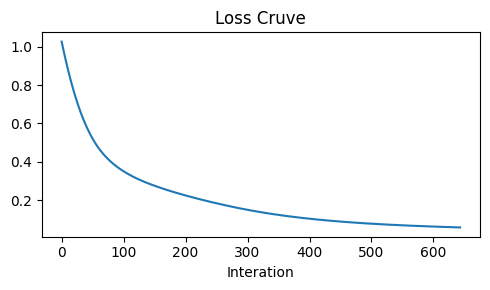

In [77]:
plt.figure(figsize=(5, 3))
plt.title('Loss Cruve')
plt.xlabel('Interation')
plt.plot(model.loss_curve_)
plt.tight_layout()

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = model.predict(x_train)

# class_name = ['Grape', 'Lemon', 'Orange']

print('Score -> {:.4f}'.format(model.score(x_train, y_train)))
print(classification_report(y_train, y_predict, target_names=class_names))
print(confusion_matrix(y_train, y_predict))

Score -> 0.9821
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      0.94      0.97        36
 Iris-virginica       0.95      1.00      0.97        38

       accuracy                           0.98       112
      macro avg       0.98      0.98      0.98       112
   weighted avg       0.98      0.98      0.98       112

[[38  0  0]
 [ 0 34  2]
 [ 0  0 38]]


Text(0.5, 1.0, 'Confusion Matrix')

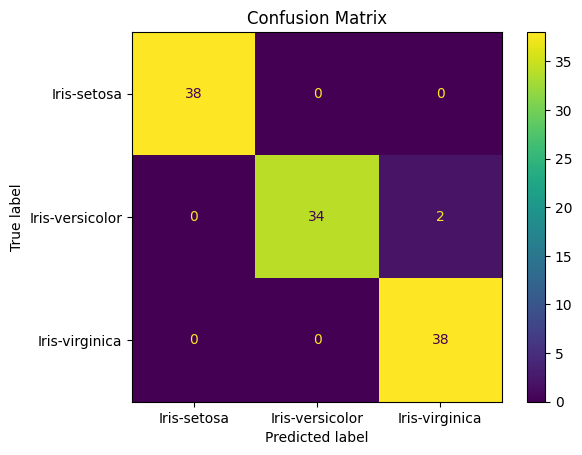

In [79]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_predict)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title('Confusion Matrix')

<h3>Prediction</h3>

In [80]:
x_new = [[6.1, 3.5, 3.9, 1.6]]

x_new_sc = sc.fit_transform(x_new)

In [81]:
y_pred = model.predict(x_new)
print(class_names[y_pred])

Index(['Iris-virginica'], dtype='object')


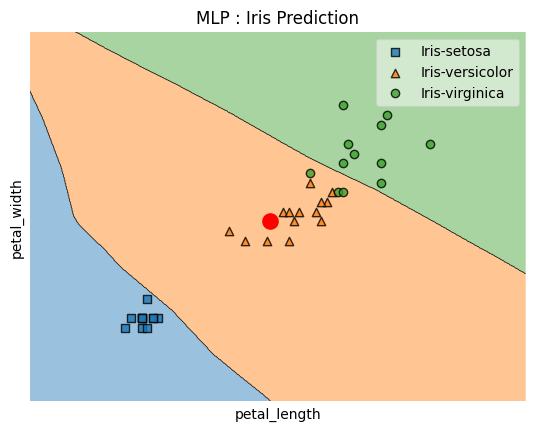

In [90]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 9.5

ax = plot_decision_regions(x_test, np.array(y_test), clf=model, feature_index=[2, 3],
                           filler_feature_values={0: value, 1: value},
                           filler_feature_ranges={0: width, 1: width}, legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title("MLP : Iris Prediction")
plt.xticks([])
plt.yticks([])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.scatter(x_new_sc[:,0], x_new_sc[:,1], marker='o', s=120, c='r')

In [91]:
#PCA
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

pca = PCA(n_components=2)

x_pca = pca.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=20)

model = MLPClassifier(random_state=1, verbose=True, max_iter=2000, hidden_layer_sizes=(50))
model.fit(x_train, y_train)

Iteration 1, loss = 1.20173527
Iteration 2, loss = 1.18302756
Iteration 3, loss = 1.16454076
Iteration 4, loss = 1.14628969
Iteration 5, loss = 1.12827634
Iteration 6, loss = 1.11052847
Iteration 7, loss = 1.09303487
Iteration 8, loss = 1.07579919
Iteration 9, loss = 1.05882984
Iteration 10, loss = 1.04213733
Iteration 11, loss = 1.02573092
Iteration 12, loss = 1.00961247
Iteration 13, loss = 0.99378464
Iteration 14, loss = 0.97825992
Iteration 15, loss = 0.96303740
Iteration 16, loss = 0.94811170
Iteration 17, loss = 0.93349563
Iteration 18, loss = 0.91919138
Iteration 19, loss = 0.90518139
Iteration 20, loss = 0.89145761
Iteration 21, loss = 0.87802490
Iteration 22, loss = 0.86488542
Iteration 23, loss = 0.85204371
Iteration 24, loss = 0.83949358
Iteration 25, loss = 0.82723630
Iteration 26, loss = 0.81525111
Iteration 27, loss = 0.80354305
Iteration 28, loss = 0.79209981
Iteration 29, loss = 0.78092824
Iteration 30, loss = 0.77002794
Iteration 31, loss = 0.75939577
Iteration 32, los

MLPClassifier(hidden_layer_sizes=50, max_iter=2000, random_state=1,
              verbose=True)

Text(0, 0.5, 'petal_width')

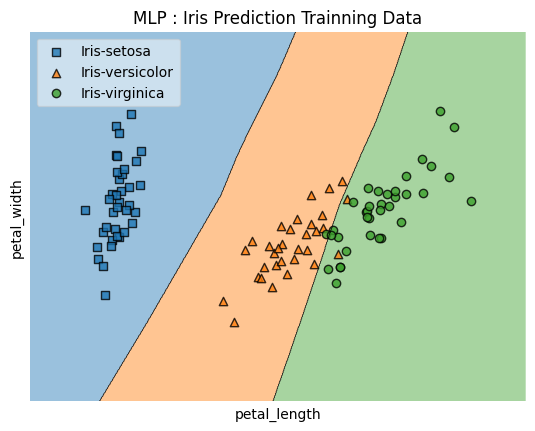

In [95]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 9.5

ax = plot_decision_regions(x_train, np.array(y_train), clf=model, legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc="upper left")

plt.title("MLP : Iris Prediction Trainning Data")
plt.xticks([])
plt.yticks([])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

# plt.scatter(x_new_sc[:,0], x_new_sc[:,1], marker='o', s=120, c='r')

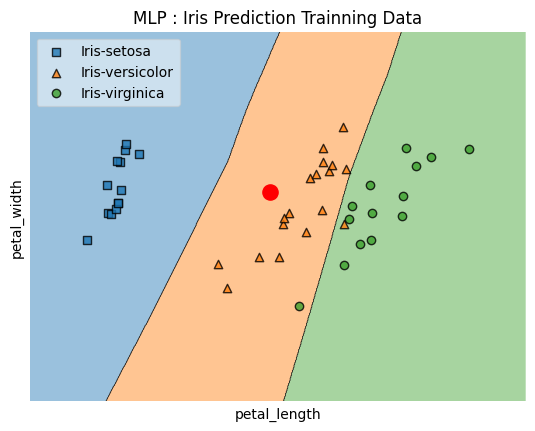

In [97]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 9.5

ax = plot_decision_regions(x_test, np.array(y_test), clf=model, legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc="upper left")

plt.title("MLP : Iris Prediction Trainning Data")
plt.xticks([])
plt.yticks([])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(x_new_sc[:,0], x_new_sc[:,1], marker='o', s=120, c='r')